In [1]:
from meteostat import Stations, Daily
from datetime import datetime
import pandas as pd

# Get best nearby weather station (e.g., New York)
stations = Stations()
stations = stations.nearby(40.7128, -74.0060)  # NYC coordinates
station = stations.fetch(1)

print("Selected Station:\n", station)

# Date range
start = datetime(2018, 1, 1)
end = datetime(2023, 12, 31)

# Get data from this station
data = Daily(station.index[0], start, end).fetch().reset_index()

# Print column summary
print("Available Columns:\n", data.columns)
print(data.isna().sum())

# Save to CSV
data.to_csv("weather_data.csv", index=False)

Selected Station:
                          name country region   wmo  icao  latitude  longitude  \
id                                                                              
KJRB0  New York / Wall Street      US     NY  <NA>  KJRB   40.7012    -74.009   

       elevation          timezone hourly_start hourly_end daily_start  \
id                                                                       
KJRB0        2.0  America/New_York   2016-07-20 2025-04-27  2016-07-21   

       daily_end monthly_start monthly_end     distance  
id                                                       
KJRB0 2022-04-24    2019-01-01  2021-01-01  1314.415384  
Available Columns:
 Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')
time       0
tavg       0
tmin       0
tmax       0
prcp    1016
snow    2111
wdir     732
wspd      94
wpgt    2111
pres     133
tsun    2111
dtype: int64


In [2]:
import pandas as pd

df = pd.read_csv("weather_data.csv")
print(df.columns)
print(df.head())
print(df.isna().sum())


Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')
         time  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt  pres  tsun
0  2018-01-01  -8.6 -12.2  -4.4   NaN   NaN    NaN   9.6   NaN   NaN   NaN
1  2018-01-02  -6.0  -8.9  -1.7   NaN   NaN  262.0  19.9   NaN   NaN   NaN
2  2018-01-03  -4.0  -7.8   0.6   NaN   NaN    NaN  13.0   NaN   NaN   NaN
3  2018-01-04  -2.9  -5.6   0.0   NaN   NaN    NaN  10.5   NaN   NaN   NaN
4  2018-01-05  -8.1 -11.1  -4.4   NaN   NaN    NaN   9.1   NaN   NaN   NaN
time       0
tavg       0
tmin       0
tmax       0
prcp    1016
snow    2111
wdir     732
wspd      94
wpgt    2111
pres     133
tsun    2111
dtype: int64


In [3]:
import pandas as pd

df = pd.read_csv("weather_data.csv")
print("🔍 Columns in the dataset:")
print(df.columns)

print("\n📉 Number of non-NaN values in each column:")
print(df.notna().sum())

print("\n📋 Data types:")
print(df.dtypes)


🔍 Columns in the dataset:
Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')

📉 Number of non-NaN values in each column:
time    2111
tavg    2111
tmin    2111
tmax    2111
prcp    1095
snow       0
wdir    1379
wspd    2017
wpgt       0
pres    1978
tsun       0
dtype: int64

📋 Data types:
time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object


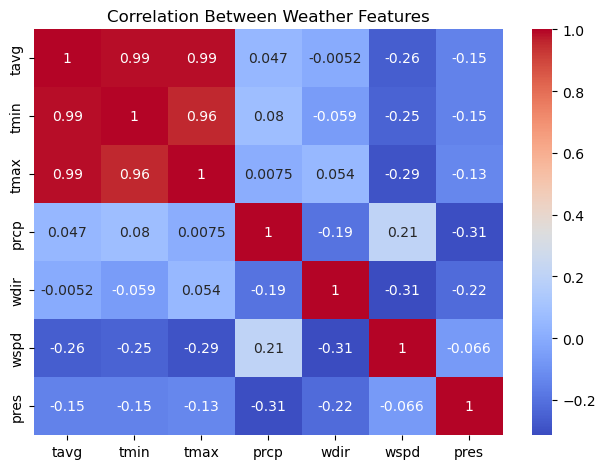

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("weather_data.csv")

# Filter numeric columns with at least 1000 non-NaN values
valid_cols = [col for col in df.select_dtypes(include='number').columns if df[col].notna().sum() > 1000]

if len(valid_cols) >= 2:
    corr = df[valid_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Between Weather Features")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough valid numeric columns for correlation heatmap.")


R² Score: 0.9974067662383432
MSE: 0.23857135186657497


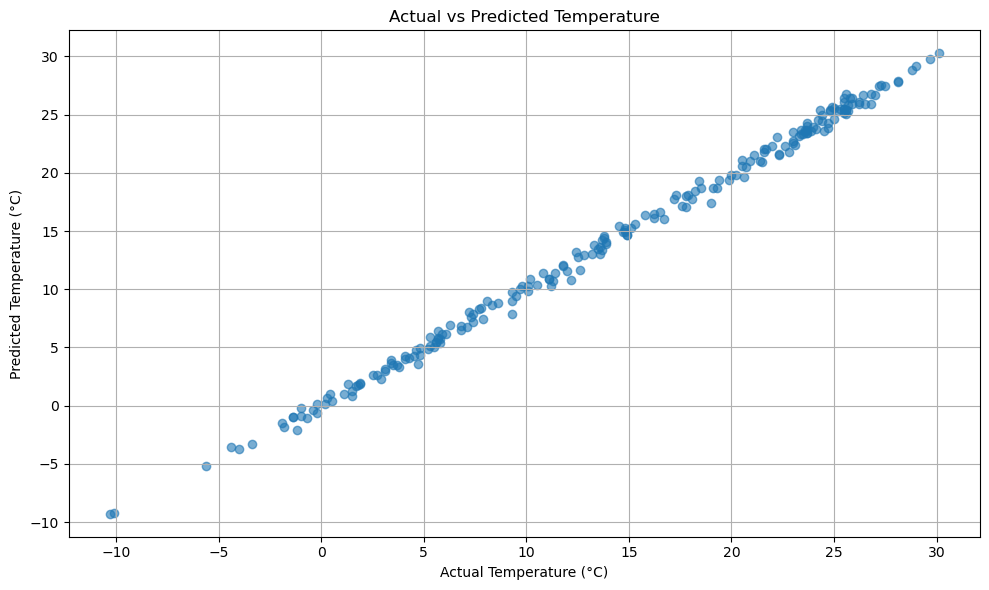

In [5]:
# model_training.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean the dataset
df = pd.read_csv("weather_data.csv")

# Drop rows where any feature or target is NaN
df = df.dropna(subset=['tavg', 'tmin', 'tmax', 'prcp', 'wspd'])

# Define features and target
X = df[['tmin', 'tmax', 'prcp', 'wspd']]
y = df['tavg']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

# Plot actual vs predicted temperatures
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(results.head(10))


   Actual  Predicted
0    19.3  18.722096
1    19.4  19.349561
2    10.5  10.379680
3    14.7  14.927569
4    24.2  24.560118
5    11.8  11.972536
6    22.0  22.322527
7    25.5  25.450936
8     7.4   7.210415
9     3.5   3.462032


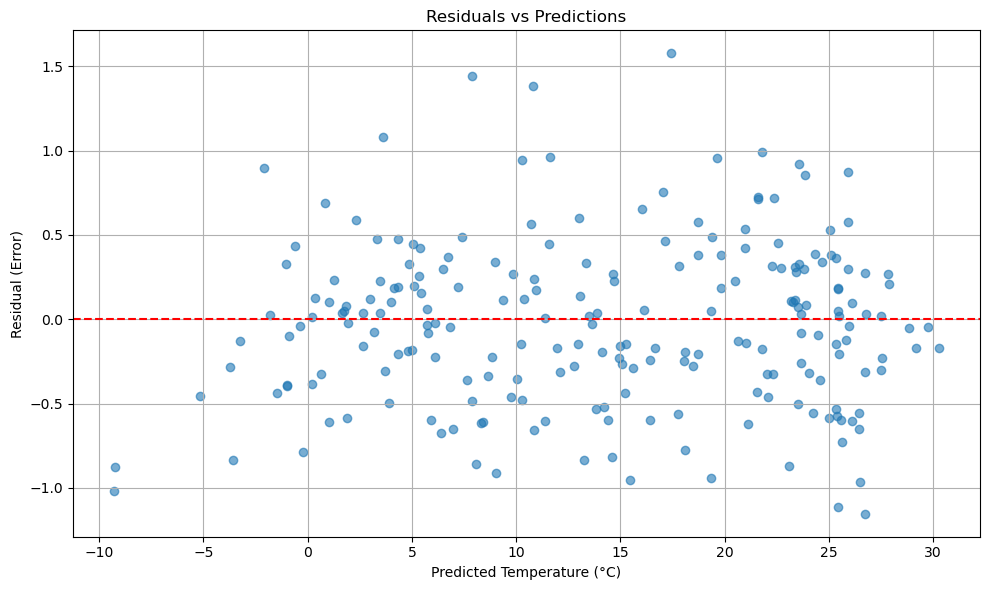

In [7]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Temperature (°C)")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs Predictions")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
print("\n🔍 Predict average temperature for a custom weather day")

# Take user inputs
tmin = float(input("Enter minimum temperature (°C): "))
tmax = float(input("Enter maximum temperature (°C): "))
prcp = float(input("Enter precipitation (mm): "))
wspd = float(input("Enter wind speed (km/h): "))

# Create a dataframe for prediction
input_data = pd.DataFrame([[tmin, tmax, prcp, wspd]], columns=['tmin', 'tmax', 'prcp', 'wspd'])

# Predict and show result
predicted_temp = model.predict(input_data)[0]
print(f"🌡️ Predicted Average Temperature: {predicted_temp:.2f} °C")



🔍 Predict average temperature for a custom weather day
🌡️ Predicted Average Temperature: 15.07 °C
